In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import plotly.io as pio
pio.templates.default = "plotly_dark"

import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [27]:
# Load Dataset
df_one=pd.read_csv("Zomatodata.csv")

In [4]:
# Dataset First Look
df_one.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
# Dataset Rows & Columns count
df_one.shape

(105, 6)

In [7]:
# Dataset Info
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [8]:
# Dataset Duplicate Value 
df_one.duplicated().value_counts()

False    105
dtype: int64

In [9]:
# Missing Values/Null Values Count
df_one.isnull().any()

Name           False
Links          False
Cost           False
Collections     True
Cuisines       False
Timings         True
dtype: bool

<AxesSubplot:>

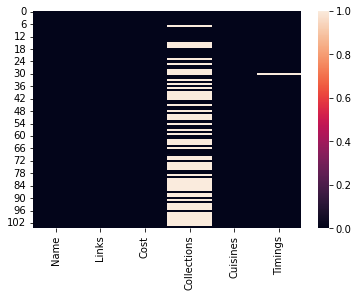

In [10]:
# Visualizing the missing values
sns.heatmap(df_one.isnull())

In [11]:
#replace null values
df_one['Collections'].fillna(method='ffill',inplace=True)

In [12]:
df_one.isna().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        1
dtype: int64

In [13]:
df_one.dropna(inplace=True)

In [14]:
df_one.isna().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

In [15]:
# Dataset Columns
df_one.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [16]:
# Dataset 
df_one.describe(include="all")

,Name,Links,Cost,Collections,Cuisines,Timings
count,104,104,104,104,104,104
unique,104,104,29,42,91,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,14,4,6


In [17]:
pd.set_option('display.max_colwidth', None)
df_one.loc[0:6,['Name','Links']]

,Name,Links
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli
1,Paradise,https://www.zomato.com/hyderabad/paradise-gachibowli
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gachibowli
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fishermans-wharf-gachibowli
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachibowli


In [18]:
pd.set_option('display.max_colwidth', None)
df_one.loc[50:54,['Name','Links']]

,Name,Links
50,Gal Punjab Di,https://www.zomato.com/hyderabad/gal-punjab-di-gachibowli
51,Hitech Bawarchi Food Zone,https://www.zomato.com/hyderabad/hitech-bawarchi-food-zone-gachibowli
52,Biryanis And More,https://www.zomato.com/hyderabad/biryanis-and-more-gachibowli
53,Diners Pavilion,https://www.zomato.com/hyderabad/diners-pavilion-gachibowli
54,Asian Meal Box,https://www.zomato.com/hyderabad/asian-meal-box-gachibowli


In [19]:
#find out the reson why Cost column has datatype object
df_one['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '700', '900', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [20]:
df_one = df_one.drop(['Links'], axis=1)

In [21]:
df_one['Cost']=df_one['Cost'].str.replace(",","").astype('int64')

In [22]:
df_one['Cost'].dtype

dtype('int64')

In [23]:
print(df_one.head())

                             Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                                                                                                        Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings   
1                                                                                                               Hyderabad's Hottest   
2                                                                                                Great Buffets, Hyderabad's Hottest   
3                                                                                                            Late Night Restaurants   
4                       Best Bars & Pubs, Food Hygiene Rated Resta

In [28]:
df_one['Cost'].iplot(kind='hist',bins=10, title='Distribution - Cost',theme="space")

AttributeError: 'Series' object has no attribute 'iplot'

In [29]:
df_one.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [35]:
import cufflinks as cf

In [33]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=cdf767a99393cbb4d05bdc0f81199fd712a155bc3f91ceb842afac4b3de4d167
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [36]:
cf.tools.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [37]:
df_one.iplot(x="Name",y='Cost', title="Per person dining cost of each Restaurant ", theme='solar',colorscale='plotly')

Exception: chart_studio is required outside of offline mode: please run pip install chart_studio

In [38]:
Top10Costly = df_one[['Name','Cost']].groupby('Name').sum().sort_values(by='Cost',ascending=False).head(10)

In [39]:
Top10Costly

,Cost
Name,
Pot Pourri,900
Club Rogue,900
Owm Nom Nom,900
Dine O China,850
Shanghai Chef 2,800
Paradise,800
Shah Ghouse Hotel & Restaurant,800
Beyond Flavours,800
Gal Punjab Di,800


In [40]:
Top10Costly.iplot(kind='bar',colorscale='plotly',theme='solar',title='Top 10 Expensive Restaurants')

Exception: chart_studio is required outside of offline mode: please run pip install chart_studio

In [ ]:
Top10BF = df_one[['Name','Cost']].groupby('Name').sum().sort_values(by='Cost',ascending=True).head(10)

In [41]:
Top10BF.iplot(kind='bar',colorscale='plotly',theme='solar',title='Top 10 Budget Friendly Restaurants')

In [ ]:
import plotly.express as px
fig1 = px.scatter(df_one,x=df_one['Cuisines'], y=df_one['Cost'],color=df_one['Name'],orientation='h',height=800,title='Cost per persons vs. Cuisines served')
fig1.show()

In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the Pandas DataFrame
# df = pd.read_csv('my_data.csv')

# Define the text preprocessing pipeline
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    nltk.download('punkt')

# = "This is an example text with 1.23 and 4.56 float values that need to be removed."

# Define a regex pattern to match float values
    pattern = r'\d+\.\d+'

# Remove float values from the text
    text_without_floats = re.sub(pattern, '', text)

# Tokenize the text to check the result
    tokens = nltk.word_tokenize(text_without_floats)
#print(tokens)
#In this example, we define a regex pattern \d+\.\d+ that matches float values in the text. We use the re.sub() function to replace all occurrences of the pattern with an empty string, effectively removing the float values from the text. Finally, we tokenize the text using the nltk.word_tokenize() function to check the result. The output should be ['This', 'is', 'an', 'example', 'text', 'with', 'and', 'float', 'values', 'that', 'need', 'to', 'be', 'removed', '.'], which does not contain any float values.



    tokens = ' '.join([str(elem) for elem in tokens])

    # Convert the text to lowercase
    tokens = tokens.lower()
    # Remove punctuation
    tokens = ''.join(c for c in text if not c.isalnum() and not c.isspace())
    # Remove stopwords
    tokens = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatize the words
    tokens = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return tokens

In [ ]:
df_one.Collections.isna().sum()

In [ ]:
df_one.dropna(inplace=True)

In [ ]:
# Apply the preprocessing pipeline on the 'text' column of the DataFrame
df_one['Collections'] = df_one['Collections'].apply(preprocess_text)

In [ ]:
df_one['Cuisines'] = df_one['Cuisines'].apply(preprocess_text)

In [ ]:
df_one.head()

In [ ]:
from wordcloud import WordCloud
from collections import Counter 
text = ' '.join(df_one['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}


word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

#Wordcloud for Cuisine
plt.figure(figsize=(15,8))
text = " ".join(name for name in word_freq.Cuisine_Words )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1800, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [ ]:
from collections import Counter 
text = ' '.join(df_one['Collections'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}


word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

#Wordcloud for Cuisine
plt.figure(figsize=(15,8))
text = " ".join(name for name in word_freq.Cuisine_Words )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 1500,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [ ]:
# Convert the 'Values' column into a list
df_one['Cuisines'] = df_one['Cuisines'].str.split(',')

# Use the explode() function on the 'Values' column
df_exploded = df_one.explode('Cuisines')

# Print the result


In [ ]:
df_exploded.info()

In [ ]:
#df_exploded.groupby('Cuisines').sum()
s = df_exploded.groupby(["Cuisines", "Name"], group_keys=True)

In [ ]:
s.max()

In [ ]:
#read the data
df_reviews = pd.read_csv("Zomatoreviews.csv")

In [ ]:
df_reviews.head()

In [ ]:
df_reviews.tail()

In [ ]:
df_reviews.shape

In [ ]:
df_reviews.info()

In [ ]:
df_reviews.duplicated().sum()

In [ ]:
df_reviews=df_reviews.drop_duplicates()

In [ ]:
df_reviews.duplicated().sum()

In [ ]:
# check the null values in each column in dataset
print(pd.DataFrame(df_reviews.isnull()).sum())

In [ ]:
df_reviews.describe(include="all")

In [ ]:
# Check Unique Values for each variable.
a=list(df_reviews.columns)
for i in a:
    print(f"The unique values in {i} are -  {df_reviews[i].nunique()}")

In [ ]:
# Write your code to make your dataset analysis ready.
df_reviews.loc[df_reviews['Rating'] == 'Like'] = np.nan
df_reviews['Rating']= df_reviews['Rating'].astype('float64')

In [ ]:
print(df_reviews['Rating'].mean())

In [ ]:
#Featuring data wrangling

In [ ]:
print(df_reviews['Rating'].mean())

In [ ]:
# split metadata column into 2 columns i.e. Reviews and followers
df_reviews['Reviews'],df_reviews['Followers']= df_reviews['Metadata'].str.split(',').str
df_reviews['Reviews'] = pd.to_numeric(df_reviews['Reviews'].str.split(' ').str[0])

In [ ]:
df_reviews['Followers']= pd.to_numeric(df_reviews['Followers'].str.split(' ').str[1])

In [ ]:
# Converting Time column into Time, Year, Month, Hour
df_reviews['Time']=pd.to_datetime(df_reviews['Time'])
df_reviews['Year'] = pd.DatetimeIndex(df_reviews['Time']).year
df_reviews['Month'] = pd.DatetimeIndex(df_reviews['Time']).month
df_reviews['Hour'] = pd.DatetimeIndex(df_reviews['Time']).hour
df_reviews = df_reviews.drop(['Metadata'], axis =1)

In [ ]:
df_reviews.isnull().sum()

In [ ]:
# Replacing followers and reviews null values into 0
df_reviews['Followers'].fillna(0,inplace=True)
df_reviews['Reviews'].fillna(0,inplace=True)

In [ ]:
df_reviews.dropna(inplace=True)
df_reviews.reset_index(inplace = True)
df_reviews.isnull().sum()

In [ ]:
df_reviews.describe(include="all")

In [ ]:
# Chart - 1 visualization code
import sweetviz as sv
detailedreport = sv.analyze(df_reviews)
detailedreport.show_notebook(layout='vertical', w=800, h=300, scale=0.7)

In [ ]:
# to find out the top reviewrs, we  will first create a list of all the reviewers
reviewer_list = df_reviews.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]
top_reviewers.head()

In [ ]:
# Chart - 2 visualization code
# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()



In [ ]:
# Average of the ratings of reviewers with review count
review_ratings=df_reviews.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:15]
top_reviewers_ratings=top_reviewers_ratings.sort_values(by = 'AverageRatings',ascending=False)
top_reviewers_ratings.head()

In [ ]:
# Chart - 3 visualization code
# Average rating of top reviewers
plt.figure(figsize=(15,6))
x = top_reviewers_ratings['AverageRatings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 15 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

In [ ]:
# Review per hour
reviews_hour = df_reviews.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

In [ ]:
# Chart - 4 visualization code
# plotting reviews per hour
plt.figure(figsize=(15,6))
x = reviews_hour['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

In [ ]:
#K-Means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('Name',axis =1)).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
# let us take 5 as initial cluster number
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('Name',axis=1))

In [ ]:
cluster_lbl = model.predict(df_cluster.drop('Name',axis=1))

In [ ]:
df_cluster['labels'] = cluster_lbl

In [ ]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

In [ ]:
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [ ]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

In [ ]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels'],axis=1).sum().sort_values(ascending=False)[:3],'\n')

In [ ]:
#PCA

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cluster.drop('Name',axis =1))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [ ]:
X_pca = pca.fit_transform(X)

In [ ]:
pca.components_

In [ ]:
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(X_pca).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores1)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
model1 = KMeans(random_state=11, n_clusters=5)
model1.fit(X_pca)

In [ ]:
cluster_labels = model1.predict(X_pca)

In [ ]:
# Making label column
df_cluster['labels'] = cluster_labels

In [ ]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y=X_pca[:,1],x=X_pca[:,0],data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('PC2',fontdict={'size':22})
plt.xlabel('PC1',fontdict={'size':22})

In [ ]:
df_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
df_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
df_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
df_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
df_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [ ]:
list_of_df = [df_0,df_1,df_2,df_3,df_4]

In [ ]:
# Most Prominent cuisines in each cluster(Top 5)
for i,df in enumerate(list_of_df):
  print(f'Top Cuisines in Cluster {i} \n', df.drop(['index','Name','Cost','Rating','labels'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')